In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist  # 28x28 images of hand written digits 0-9

(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test, axis =1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 7s 114us/step - loss: 0.2691 - acc: 0.9206
Epoch 2/3
60000/60000 [==============================] - 6s 103us/step - loss: 0.1098 - acc: 0.9657
Epoch 3/3
60000/60000 [==============================] - 6s 105us/step - loss: 0.0762 - acc: 0.9762


In [2]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 40us/step
0.0880043384947814 0.9709


In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

<Figure size 640x480 with 1 Axes>

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [4]:
model.save('num_reader.model')

In [5]:
new_model = tf.keras.models.load_model('num_reader.model')

In [6]:
predictions = new_model.predict([x_test])

In [8]:
print(predictions)

[[7.3514761e-10 1.0897637e-08 1.6654632e-05 ... 9.9993014e-01
  2.6979333e-07 7.1863832e-07]
 [1.4818875e-08 8.2596410e-03 9.9171340e-01 ... 1.4072736e-08
  7.6059081e-08 5.7857256e-13]
 [2.8799869e-07 9.9981350e-01 1.4009363e-05 ... 5.9639726e-05
  8.1084574e-05 2.3632990e-07]
 ...
 [5.2475446e-09 3.3370297e-06 2.3963753e-07 ... 6.4043423e-05
  1.6723781e-05 7.9091747e-05]
 [1.3653468e-05 1.6576130e-06 1.6869939e-06 ... 4.6078189e-06
  9.5724817e-03 8.1005197e-08]
 [1.6961576e-07 2.8490234e-07 8.6669803e-07 ... 1.3132820e-10
  9.6606541e-08 2.7583729e-09]]


In [15]:
import numpy as np

print(np.argmax(predictions[54]))

6


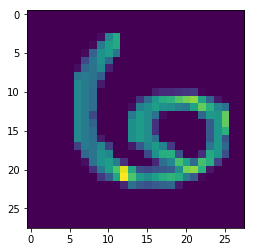

In [14]:
plt.imshow(x_test[54])
plt.show()